In [1]:
import pandas
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')

In [3]:
y = clean_dataset['default']
x = clean_dataset.drop('default', axis=1)

In [4]:
x.head()

,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,other_installment_plans,housing,credits_this_bank,job,telephone,foreign_worker,sexo,estado_civil,rango_valor_credito,rango_plazos_credito,rango_edad
0,1,5,1,1,4,1,1,3,2,2,3,1,1,0,1,2,1,5
1,2,3,5,3,2,1,1,3,2,1,3,0,1,1,0,6,4,1
2,4,5,5,2,2,1,1,3,2,1,2,0,1,0,1,3,1,3
3,1,3,5,2,2,3,2,3,3,1,3,0,1,0,1,8,4,3
4,1,4,5,3,3,1,4,3,3,2,3,0,1,0,1,5,2,4


In [5]:

normalizer = StandardScaler()
x_normalized = normalizer.fit_transform(x)

In [6]:
x_normalized

array([[-1.06271653,  1.50687935, -2.01779722, ..., -0.62124939,
        -1.05547493,  2.80548   ],
       [-0.25059691, -0.33157912,  0.68482522, ...,  0.79816986,
         1.95811766, -0.85668504],
       [ 1.37364232,  1.50687935,  0.68482522, ..., -0.26639458,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -2.17003758,  0.68482522, ..., -0.62124939,
        -1.05547493, -0.85668504],
       [-0.25059691, -0.33157912,  0.68482522, ..., -0.26639458,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.33157912,  0.68482522, ..., -0.62124939,
        -1.05547493, -0.85668504]])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

In [8]:
#entrenando el modelo
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [9]:
predictions = model.predict(x_test)
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

## Evaluamos el modelo

### Matriz de confusión

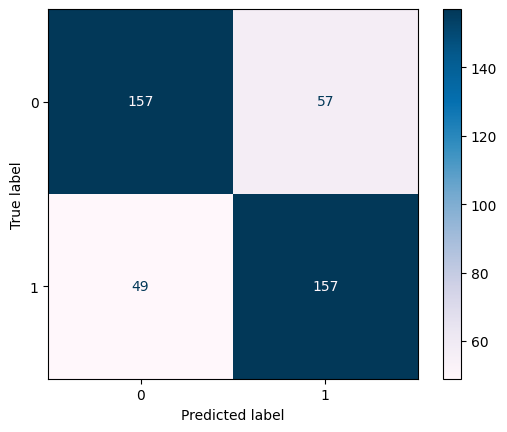

In [10]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [11]:
confmatrix

array([[157,  57],
       [ 49, 157]], dtype=int64)

In [12]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [13]:
tn = confmatrix[0][0]
fp = confmatrix[0][1]
specificity = tn/(tn + fp)
specificity

0.7336448598130841

In [14]:
model_scores = {
  'model': 'LogisticRegression',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc,
  'specificity' : specificity
}
model_scores

{'model': 'LogisticRegression',
 'accuracy': 0.7476190476190476,
 'precision': 0.7336448598130841,
 'recall': 0.7621359223300971,
 'f1_score': 0.7476190476190476,
 'roc_auc_score': 0.7478903910715906,
 'specificity': 0.7336448598130841}

In [15]:
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [16]:
save_scores(model_scores)

['El archivo existe',
 'El modelo existe',
 'Se reemplazaron los valores del modelo',
 'Se sobrescrive el archivo scores.csv con valores nuevos']